# Prototype Climate Impact Lab Interface

## Workspace Setup

Import some python modules

In [159]:
%matplotlib inline
from matplotlib import pyplot as plt
import prototype
reload(prototype)

<module 'prototype' from 'prototype.py'>

## Connect to the API

Authenticate with the [prototype] API, and define how you want to use the system

In [160]:
api = prototype.ClimateImpactLabDataAPI(
    username='mdelgado', 
    password='*********')

api.configure(sample='median', location='OSDC', priority='low')

TypeError: tuples to convert into variables must be of the form (dims, data[, attrs, encoding]): (ir, [0])

## Retrieve formatted Climate Impact Lab variables

In [138]:
tasmin  = api.get_variable('GCP.Climate.Projection.GridQtrDeg.Tasmin')
tasmax  = api.get_variable('GCP.Climate.Projection.GridQtrDeg.Tasmax')

In [139]:
# Get variable attributes
tas = (tasmin + tasmax)/2

In [140]:
tas.display()

<IPython.core.display.Latex object>

In [144]:
tas.attrs['gcp_id'] = 'GCP.Climate.Projection.GridQtrDeg.Tas2'
tas.attrs['name'] = 'Tas2'
tas.attrs.get('gcp_id')

'GCP.Climate.Projection.GridQtrDeg.Tas2'

In [142]:
api.publish(tas, latex='T')

gcp_id: a
name: a
latex: a
description: a
author: a


## Do math with Impact Lab variables

In [14]:
# From the NAS mortality presentation...

betahat = alpha+gamma1*avg_days_per_bin+gamma2*(gdp_per_capita.ln())+gamma3*(pop_density.ln())

In [15]:
# define how your new variable should look
betahat.symbol = '\\hat{{\\beta}}'

In [16]:
# show LaTeX for the math we just did
betahat.display()

<IPython.core.display.Latex object>

In [156]:
class Dim(object):
    def __init__(self, name, id):
        self.name = name
        self.id = id
    def __repr__(self):
        return self.name
    
tasmin.value.dims = (
    Dim('lat', 'GCP.Index.Latitude'), 
    Dim('lon', 'GCP.Index.Longitude'),
    Dim('time', 'GCP.Index.Days365'))


AttributeError: you cannot assign dims on a DataArray. Use .rename() or .swap_dims() instead.

## Use functions from xArray and the rest of python

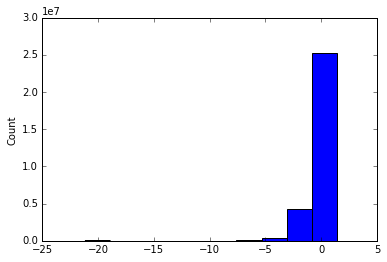

In [9]:
ax = betahat.value.plot()
plt.show(ax)

## The next step in the calculation...

In [10]:
# simplify the representation of betahat:
betahat.symbolic = '\\hat{{\\beta}}'

In [11]:
# sum betahat*temp across bins
mortality = (betahat * temp).sum(dim='bins')

# declare a symbol for mortality
mortality.symbol = 'M'

In [12]:
mortality.display()

<IPython.core.display.Latex object>

Note that the dimensionality of mortality is less than beta and temp in the LaTeX and data:

In [13]:
mortality.value

<xarray.DataArray (adm2: 24999, time: 100)>
array([[ -2.92124395e+00,  -1.99362992e+00,  -8.93652801e-01, ...,
          1.10621390e+00,   2.57830688e+00,  -2.29306181e+00],
       [ -1.38629855e+00,  -7.76493092e+00,   2.03159987e+00, ...,
         -3.41893630e+00,  -4.84213829e+00,  -2.45017356e+00],
       [  1.56519757e+00,  -2.41087398e-01,  -4.24496624e-01, ...,
          1.36587685e+00,  -5.93521188e-01,   2.76255544e+00],
       ..., 
       [ -3.31492736e+00,   6.77445891e-03,  -5.47755159e+00, ...,
         -6.10378895e+00,   3.93503051e+00,  -3.73371494e+00],
       [  3.06004915e+00,   2.91296446e+00,   3.59191665e+00, ...,
         -7.61977078e+00,   5.19491826e-01,  -1.90245230e+00],
       [ -7.99817007e+00,  -4.96106865e+00,   3.18680168e+00, ...,
         -8.19163235e+00,  -8.54668938e-01,  -8.54509732e-01]])
Coordinates:
  * adm2     (adm2) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * time     (time) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 1

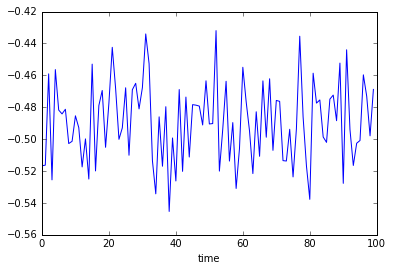

In [14]:
ax = mortality.value.mean(dim='adm2').plot()
plt.show(ax)